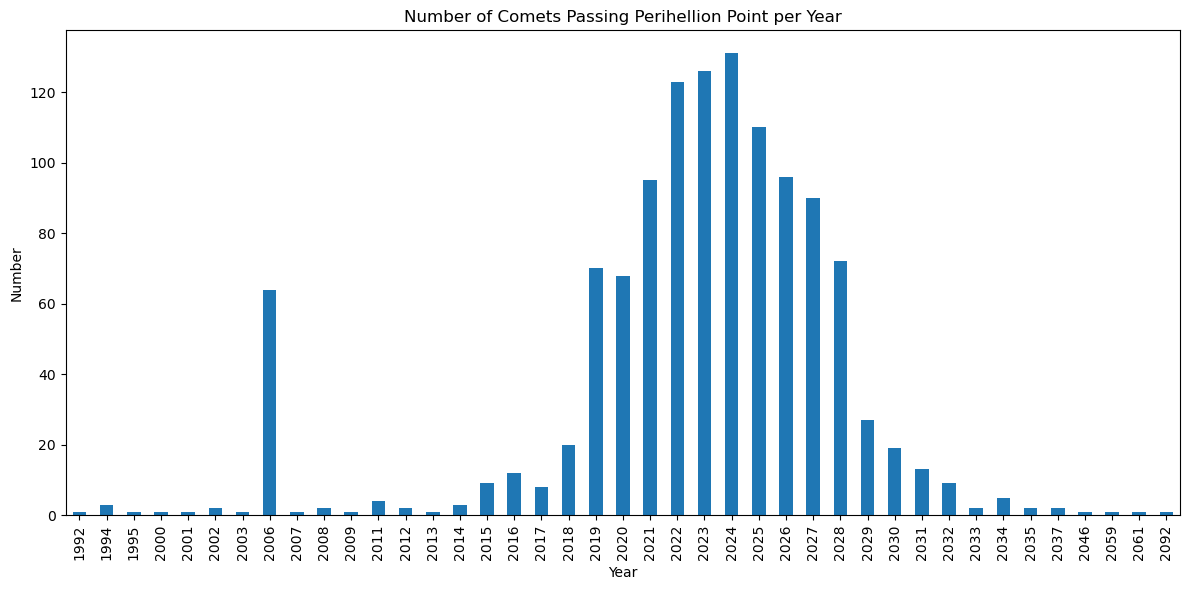

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

col_positions = [(0, 4),    # Periodic comet number
                 (4, 5),    # Orbit type (C, P, D)
                 (5, 12),   # Provisional designation (packed form)
                 # 13-14 Blank
                 (14, 18),  # Year of perihelion passage
                 # 19 Blank
                 (19, 21),  # Month of perihelion passage
                 # 22 Blank
                 (22, 29),  # Day of perihelion passage (TT)
                 # 30 Blank
                 (30, 39),  # Perihelion distance (AU)
                 # 40-41 Blank
                 (41, 49),  # Orbital eccentricity
                 # 50-51 Blank
                 (51, 59),  # Argument of perihelion, J2000.0 (degrees)
                 # 60-61 Blank
                 (61, 69),  # Longitude of the ascending node, J2000.0 (degrees)
                 # 70-71 Blank
                 (71, 79),  # Inclination in degrees, J2000.0 (degrees)
                 # 80-81 Blank
                 (81, 85),  # Year of epoch for perturbed solutions
                 (85, 87),  # Month of epoch for perturbed solutions
                 (87, 89),  # Day of epoch for perturbed solutions
                 # 90-91 Blank
                 (91, 95),  # Absolute magnitude
                 # 96 Blank
                 (96, 100), # Slope parameter
                 # 101-102 Blank
                 (102, 158), # Designation and Name
                 # 159 Blank
                 (159, 168) # Reference
                ]

column_names = ['Comet_Number', 'Orbit_Type', 'Provisional_Designation',
                'Perihelion_Year', 'Perihelion_Month', 'Perihelion_Day',
                'Perihelion_Distance_AU', 'Eccentricity',
                'Arg_of_Perihelion_deg', 'Asc_Node_deg', 'Inclination_deg',
                'Epoch_Year', 'Epoch_Month', 'Epoch_Day',
                'Absolute_Magnitude', 'Slope_Parameter',
                'Designation_and_Name', 'Reference']

df_comets = pd.read_fwf('CometEls.txt', colspecs=col_positions, names=column_names, skipinitialspace=True, header=None)

yearly_counts = df_comets['Perihelion_Year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
yearly_counts.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Number')
plt.title('Number of Comets Passing Perihellion Point per Year')
plt.tight_layout()
plt.show()

Pearson correlation constant r = -0.415


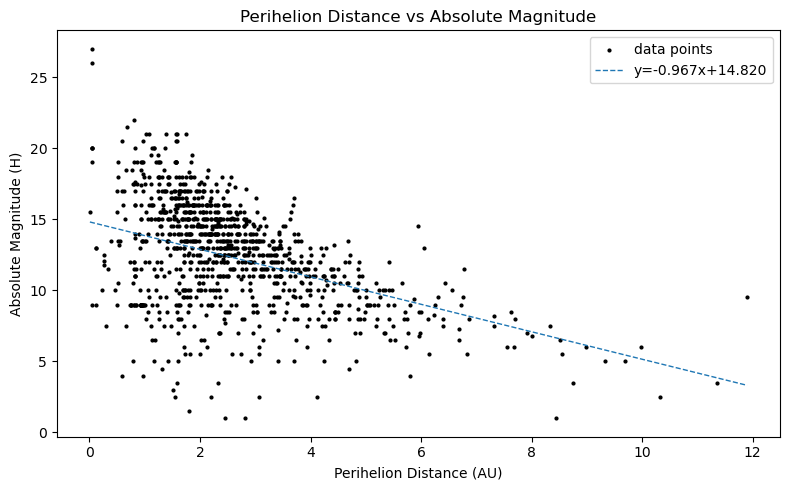

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

col_positions = [(0, 4),    # Periodic comet number
                 (4, 5),    # Orbit type (C, P, D)
                 (5, 12),   # Provisional designation (packed form)
                 # 13-14 Blank
                 (14, 18),  # Year of perihelion passage
                 # 19 Blank
                 (19, 21),  # Month of perihelion passage
                 # 22 Blank
                 (22, 29),  # Day of perihelion passage (TT)
                 # 30 Blank
                 (30, 39),  # Perihelion distance (AU)
                 # 40-41 Blank
                 (41, 49),  # Orbital eccentricity
                 # 50-51 Blank
                 (51, 59),  # Argument of perihelion, J2000.0 (degrees)
                 # 60-61 Blank
                 (61, 69),  # Longitude of the ascending node, J2000.0 (degrees)
                 # 70-71 Blank
                 (71, 79),  # Inclination in degrees, J2000.0 (degrees)
                 # 80-81 Blank
                 (81, 85),  # Year of epoch for perturbed solutions
                 (85, 87),  # Month of epoch for perturbed solutions
                 (87, 89),  # Day of epoch for perturbed solutions
                 # 90-91 Blank
                 (91, 95),  # Absolute magnitude
                 # 96 Blank
                 (96, 100), # Slope parameter
                 # 101-102 Blank
                 (102, 158), # Designation and Name
                 # 159 Blank
                 (159, 168) # Reference
                ]

column_names = ['Comet_Number', 'Orbit_Type', 'Provisional_Designation',
                'Perihelion_Year', 'Perihelion_Month', 'Perihelion_Day',
                'Perihelion_Distance_AU', 'Eccentricity',
                'Arg_of_Perihelion_deg', 'Asc_Node_deg', 'Inclination_deg',
                'Epoch_Year', 'Epoch_Month', 'Epoch_Day',
                'Absolute_Magnitude', 'Slope_Parameter',
                'Designation_and_Name', 'Reference']

df_comets = pd.read_fwf('CometEls.txt', colspecs=col_positions, names=column_names, skipinitialspace=True, header=None)

df = df_comets.copy()

mask = (df['Eccentricity'] < 1) & df['Absolute_Magnitude'].notna()
df = df[mask]

r = df['Perihelion_Distance_AU'].corr(df['Absolute_Magnitude'])
print(f'Pearson correlation constant r = {r:.3f}')

x = df['Perihelion_Distance_AU']
y = df['Absolute_Magnitude']
coeffs = np.polyfit(x, y, deg=1)
poly1d_fn = np.poly1d(coeffs)

plt.figure(figsize=(8, 5))
plt.scatter(df['Perihelion_Distance_AU'], df['Absolute_Magnitude'], s = 2 ** 2, color = 'k', label = 'data points')
x_line = np.linspace(x.min(), x.max(), 200)
plt.plot(x_line, poly1d_fn(x_line), linestyle='--', linewidth=1, label=f'y={coef[0]:.3f}x+{coef[1]:.3f}')
plt.xlabel('Perihelion Distance (AU)')
plt.ylabel('Absolute Magnitude (H)')
plt.title('Perihelion Distance vs Absolute Magnitude')
plt.legend()
plt.tight_layout()
plt.show()

Pearson correlation constant r = 0.987


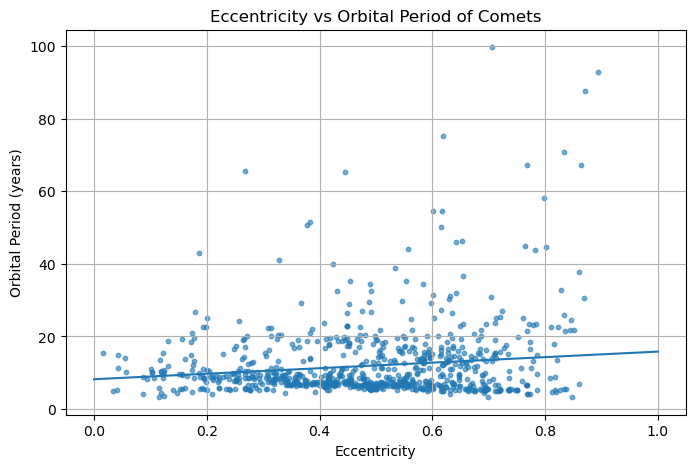

In [ ]:
import pandas as pd
import numpy as np

col_positions = [(0, 4),    # Periodic comet number
                 (4, 5),    # Orbit type (C, P, D)
                 (5, 12),   # Provisional designation (packed form)
                 (14, 18),  # Year of perihelion passage
                 (19, 21),  # Month of perihelion passage
                 (22, 29),  # Day of perihelion passage (TT)
                 (30, 39),  # Perihelion distance (AU)
                 (41, 49),  # Orbital eccentricity
                 (51, 59),  # Argument of perihelion, J2000.0 (deg)
                 (61, 69),  # Ascending node, J2000.0 (deg)
                 (71, 79),  # Inclination (deg)
                 (81, 85),  # Epoch year
                 (85, 87),  # Epoch month
                 (87, 89),  # Epoch day
                 (91, 95),  # Absolute magnitude
                 (96, 100), # Slope parameter
                 (102, 158),# Designation and Name
                 (159, 168) # Reference
                ]

column_names = ['Comet_Number', 'Orbit_Type', 'Provisional_Designation',
                'Perihelion_Year', 'Perihelion_Month', 'Perihelion_Day',
                'Perihelion_Distance_AU', 'Eccentricity',
                'Arg_of_Perihelion_deg', 'Asc_Node_deg', 'Inclination_deg',
                'Epoch_Year', 'Epoch_Month', 'Epoch_Day',
                'Absolute_Magnitude', 'Slope_Parameter',
                'Designation_and_Name', 'Reference']

df = pd.read_fwf('CometEls.txt', colspecs=col_positions, names=column_names, skipinitialspace=True, header=None)

df_clean = df[df['Eccentricity'].notna() & (df['Eccentricity'] < 1.0)]

q = df_clean['Perihelion_Distance_AU']
e = df_clean['Eccentricity']
a = q / (1 - e)
P = a ** 1.5

mask = (e <= 0.9) & (P <= 100)
df_filtered = df_clean[mask].copy()

df_filtered['Semi_major_axis_AU'] = a[mask]
df_filtered['Period_years'] = P[mask]

r = df_filtered['Semi_major_axis_AU'].corr(df_filtered['Period_years'])
print(f'Pearson correlation constant r = {r:.3f}')

coeffs = np.polyfit(df_filtered['Eccentricity'].astype(float), df_filtered['Period_years'], 1)

x = np.linspace(0, 1, 100)

plt.figure(figsize=(8,5))
plt.scatter(df_filtered['Eccentricity'].astype(float), df_filtered['Period_years'], s=10, alpha=0.6)
plt.plot(x, coeffs[0] * x + coeffs[1])
plt.xlabel('Eccentricity')
plt.ylabel('Orbital Period (years)')
plt.title('Eccentricity vs Orbital Period of Comets')
plt.grid(True)
plt.show()

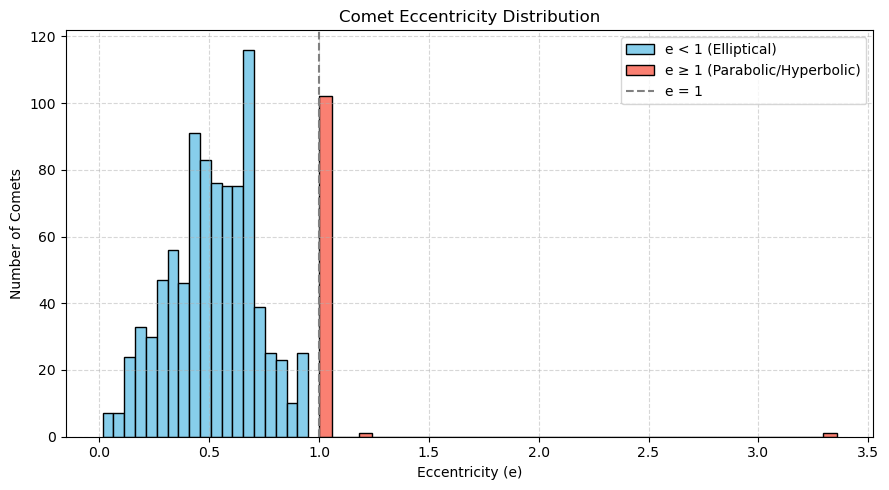

In [17]:
import pandas as pd
import numpy as np

col_positions = [(0, 4),    # Periodic comet number
                 (4, 5),    # Orbit type (C, P, D)
                 (5, 12),   # Provisional designation (packed form)
                 (14, 18),  # Year of perihelion passage
                 (19, 21),  # Month of perihelion passage
                 (22, 29),  # Day of perihelion passage (TT)
                 (30, 39),  # Perihelion distance (AU)
                 (41, 49),  # Orbital eccentricity
                 (51, 59),  # Argument of perihelion, J2000.0 (deg)
                 (61, 69),  # Ascending node, J2000.0 (deg)
                 (71, 79),  # Inclination (deg)
                 (81, 85),  # Epoch year
                 (85, 87),  # Epoch month
                 (87, 89),  # Epoch day
                 (91, 95),  # Absolute magnitude
                 (96, 100), # Slope parameter
                 (102, 158),# Designation and Name
                 (159, 168) # Reference
                ]

column_names = ['Comet_Number', 'Orbit_Type', 'Provisional_Designation',
                'Perihelion_Year', 'Perihelion_Month', 'Perihelion_Day',
                'Perihelion_Distance_AU', 'Eccentricity',
                'Arg_of_Perihelion_deg', 'Asc_Node_deg', 'Inclination_deg',
                'Epoch_Year', 'Epoch_Month', 'Epoch_Day',
                'Absolute_Magnitude', 'Slope_Parameter',
                'Designation_and_Name', 'Reference']

df_comets = pd.read_fwf('CometEls.txt', colspecs=col_positions, names=column_names, skipinitialspace=True, header=None)

ecc_e_lt1 = df_comets[df_comets['Eccentricity'] < 1]['Eccentricity'].dropna()
ecc_e_ge1 = df_comets[df_comets['Eccentricity'] >= 1]['Eccentricity'].dropna()

bins_left = np.linspace(np.min(df_comets['Eccentricity']), 1, 20, endpoint=False)
bins_right = np.linspace(1, np.max(df_comets['Eccentricity']), 40)
plt.figure(figsize=(9, 5))
plt.hist(ecc_e_lt1, bins=bins_left, color='skyblue', label='e < 1 (Elliptical)', edgecolor='k')
plt.hist(ecc_e_ge1, bins=bins_right, color='salmon', label='e ≥ 1 (Parabolic/Hyperbolic)', edgecolor='k')
plt.axvline(1.0, color='gray', linestyle='--', label='e = 1')
plt.xlabel('Eccentricity (e)')
plt.ylabel('Number of Comets')
plt.title('Comet Eccentricity Distribution')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

c:\Users\peach\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


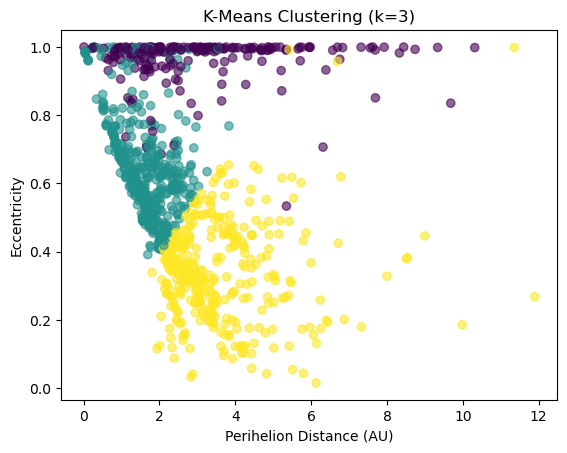

In [22]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd

col_positions = [(0, 4),    # Periodic comet number
                 (4, 5),    # Orbit type (C, P, D)
                 (5, 12),   # Provisional designation (packed form)
                 # 13-14 Blank
                 (14, 18),  # Year of perihelion passage
                 # 19 Blank
                 (19, 21),  # Month of perihelion passage
                 # 22 Blank
                 (22, 29),  # Day of perihelion passage (TT)
                 # 30 Blank
                 (30, 39),  # Perihelion distance (AU)
                 # 40-41 Blank
                 (41, 49),  # Orbital eccentricity
                 # 50-51 Blank
                 (51, 59),  # Argument of perihelion, J2000.0 (degrees)
                 # 60-61 Blank
                 (61, 69),  # Longitude of the ascending node, J2000.0 (degrees)
                 # 70-71 Blank
                 (71, 79),  # Inclination in degrees, J2000.0 (degrees)
                 # 80-81 Blank
                 (81, 85),  # Year of epoch for perturbed solutions
                 (85, 87),  # Month of epoch for perturbed solutions
                 (87, 89),  # Day of epoch for perturbed solutions
                 # 90-91 Blank
                 (91, 95),  # Absolute magnitude
                 # 96 Blank
                 (96, 100), # Slope parameter
                 # 101-102 Blank
                 (102, 158), # Designation and Name
                 # 159 Blank
                 (159, 168) # Reference
                ]

column_names = ['Comet_Number', 'Orbit_Type', 'Provisional_Designation',
                'Perihelion_Year', 'Perihelion_Month', 'Perihelion_Day',
                'Perihelion_Distance_AU', 'Eccentricity',
                'Arg_of_Perihelion_deg', 'Asc_Node_deg', 'Inclination_deg',
                'Epoch_Year', 'Epoch_Month', 'Epoch_Day',
                'Absolute_Magnitude', 'Slope_Parameter',
                'Designation_and_Name', 'Reference']

df = pd.read_fwf('CometEls.txt', colspecs=col_positions, names=column_names, skipinitialspace=True, header=None)

df = df[df['Eccentricity'] < 1]
features = df[['Perihelion_Distance_AU', 'Eccentricity', 'Inclination_deg']].dropna()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=3, random_state=42).fit(X_scaled)
labels = kmeans.labels_

features_plot = features.copy()
features_plot['cluster'] = labels

plt.scatter(features_plot['Perihelion_Distance_AU'],
            features_plot['Eccentricity'],
            c=features_plot['cluster'],
            alpha=0.6)
plt.xlabel('Perihelion Distance (AU)')
plt.ylabel('Eccentricity')
plt.title('K-Means Clustering (k=3)')
plt.show()

c:\Users\peach\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


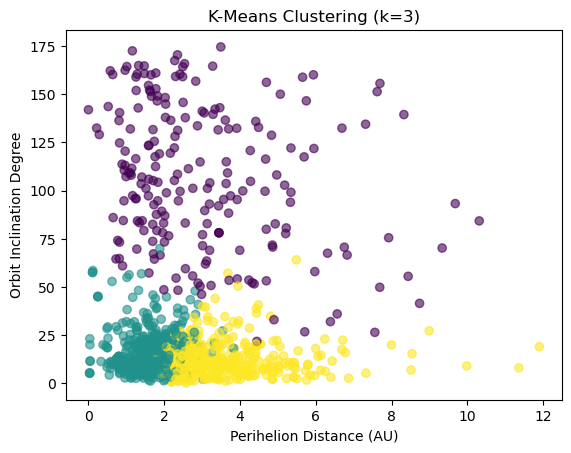

In [23]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd

col_positions = [(0, 4),    # Periodic comet number
                 (4, 5),    # Orbit type (C, P, D)
                 (5, 12),   # Provisional designation (packed form)
                 # 13-14 Blank
                 (14, 18),  # Year of perihelion passage
                 # 19 Blank
                 (19, 21),  # Month of perihelion passage
                 # 22 Blank
                 (22, 29),  # Day of perihelion passage (TT)
                 # 30 Blank
                 (30, 39),  # Perihelion distance (AU)
                 # 40-41 Blank
                 (41, 49),  # Orbital eccentricity
                 # 50-51 Blank
                 (51, 59),  # Argument of perihelion, J2000.0 (degrees)
                 # 60-61 Blank
                 (61, 69),  # Longitude of the ascending node, J2000.0 (degrees)
                 # 70-71 Blank
                 (71, 79),  # Inclination in degrees, J2000.0 (degrees)
                 # 80-81 Blank
                 (81, 85),  # Year of epoch for perturbed solutions
                 (85, 87),  # Month of epoch for perturbed solutions
                 (87, 89),  # Day of epoch for perturbed solutions
                 # 90-91 Blank
                 (91, 95),  # Absolute magnitude
                 # 96 Blank
                 (96, 100), # Slope parameter
                 # 101-102 Blank
                 (102, 158), # Designation and Name
                 # 159 Blank
                 (159, 168) # Reference
                ]

column_names = ['Comet_Number', 'Orbit_Type', 'Provisional_Designation',
                'Perihelion_Year', 'Perihelion_Month', 'Perihelion_Day',
                'Perihelion_Distance_AU', 'Eccentricity',
                'Arg_of_Perihelion_deg', 'Asc_Node_deg', 'Inclination_deg',
                'Epoch_Year', 'Epoch_Month', 'Epoch_Day',
                'Absolute_Magnitude', 'Slope_Parameter',
                'Designation_and_Name', 'Reference']

df = pd.read_fwf('CometEls.txt', colspecs=col_positions, names=column_names, skipinitialspace=True, header=None)

df = df[df['Eccentricity'] < 1]
features = df[['Perihelion_Distance_AU', 'Eccentricity', 'Inclination_deg']].dropna()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=3, random_state=42).fit(X_scaled)
labels = kmeans.labels_

features_plot = features.copy()
features_plot['cluster'] = labels

plt.scatter(features_plot['Perihelion_Distance_AU'],
            features_plot['Inclination_deg'],
            c=features_plot['cluster'],
            alpha=0.6)
plt.xlabel('Perihelion Distance (AU)')
plt.ylabel('Orbit Inclination Degree')
plt.title('K-Means Clustering (k=3)')
plt.show()